In [1]:
import numpy as np
import pandas as pd
import random
import math
import statistics as stat
import matplotlib.pyplot as plt
import itertools
import warnings
import bisect
from simul_file import mmn_queueing_jsq, queue_length_time_graph, \
                        mmn_queueing_redundancy_dos, mmn_queueing_redundancy_doc, \
                        mmn_queueing_redundancy_dos_identical, \
                        mmn_queueing_redundancy_doc_identical, \
                        mmn_queueing_redundancy_dos_weibull, \
                        mmn_queueing_redundancy_doc_weibull,\
                        mmn_queueing_jsq_weibull, weibull_scale_calculator, \
                        system_compare

In [ ]:
def system_compare(system1,system2):
    '''
    Please input the outputs of the queueing function of the two systems.
    '''

    if system1[7]['simulation_time'] != system2[7]['simulation_time']:
        raise Exception("the two systems should have same simulation time")

    aaa = system1[0].iloc[np.where(system1[0]["Time"][1:].to_numpy() != system1[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    bbb = system2[0].iloc[np.where(system2[0]["Time"][1:].to_numpy() != system2[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    plt.figure(1)
    plt.plot(aaa['Time'],aaa['Live_track'],label='system1')
    plt.plot(bbb['Time'],bbb['Live_track'],label='system2')
    plt.title('Comparison of the two systems')
    plt.xlabel('Time')
    plt.ylabel('# Customers')
    plt.legend()
    
    
    sys1_timing = system1[8]
    sys1_timing['act'] = sys1_timing['Finish'] - sys1_timing['Start']
    sys2_timing = system2[8]
    sys2_timing['act'] = sys2_timing['Finish'] - sys2_timing['Start']
    sys1_timing['cma'] = sys1_timing['act'].expanding().mean()
    sys2_timing['cma'] = sys2_timing['act'].expanding().mean()

    plt.figure(2)
    plt.plot(aaa['Time'],sys1_timing['cma'],label='system1')
    plt.plot(bbb['Time'],sys2_timing['cma'],label='system2')
    plt.title('Comparison of the two systems')
    plt.xlabel('Time')
    plt.ylabel('ACT')
    plt.legend()
    
    
    
    
    
    
    
    
    
    

#     sys1_data = np.array([])
#     for i in range(1,system1[7]['simulation_time']+1):
#         sys1_data=np.append(sys1_data,aaa[aaa['Time']<i].iloc[-1,-3])
#     sys2_data = np.array([])
#     for i in range(1,system2[7]['simulation_time']+1):
#         sys2_data=np.append(sys2_data,bbb[bbb['Time']<i].iloc[-1,-3])
#     diff = sys1_data - sys2_data
    
#     result = np.array([sum(diff>0)/system1[7]['simulation_time'],\
#                        sum(diff==0)/system1[7]['simulation_time'],\
#                        sum(diff<0)/system1[7]['simulation_time']])

#     # Forward order
#     if result[0] - result[2] > 0.75:
#         print("System 1 is significantly better than system 2")
#         print(f"System 1 is better on {result[0]*100}% of the time")
#         print(f"System 2 is better on {result[2]*100}% of the time")
#     elif 0.75 >= result[0] - result[2] > 0.55:
#         print("System 1 is substantially better than system 2")
#         print(f"System 1 is better on {result[0]*100}% of the time")
#         print(f"System 2 is better on {result[2]*100}% of the time")
#     elif 0.55 >= result[0] - result[2] > 0.35:
#         print("System 1 is moderately better than system 2")
#         print(f"System 1 is better on {result[0]*100}% of the time")
#         print(f"System 2 is better on {result[2]*100}% of the time")
#     elif 0.35 >= result[0] - result[2] > 0.15:
#         print("System 1 is slightly better than system 2")
#         print(f"System 1 is better on {result[0]*100}% of the time")
#         print(f"System 2 is better on {result[2]*100}% of the time")
    
#     # 5/5
#     elif 0.15 >= result[0] - result[2] > -0.15:
#         print("The 2 systems have almost the same performance")
#         print(f"System 1 is better on {result[0]*100}% of the time")
#         print(f"System 2 is better on {result[2]*100}% of the time")
    
#     # reverse order
#     elif -0.15 >= result[0] - result[2] > -0.35:
#         print("System 2 is slightly better than system 1")
#         print(f"System 1 is better on {result[0]*100}% of the time")
#         print(f"System 2 is better on {result[2]} of the time")
#     elif -0.35 >= result[0] - result[2] > -0.55:
#         print("System 2 is moderately better than system 1")
#         print(f"System 1 is better on {result[0]*100}% of the time")
#         print(f"System 2 is better on {result[2]*100}% of the time")
#     elif -0.55 >= result[0] - result[2] > -0.75:
#         print("System 2 is substantially better than system 1")
#         print(f"System 1 is better on {result[0]*100}% of the time")
#         print(f"System 2 is better on {result[2]*100}% of the time")
#     elif -0.75 >= result[0] - result[2]:
#         print("System 2 is significantly better than system 1")
#         print(f"System 1 is better on {result[0]*100}% of the time")
#         print(f"System 2 is better on {result[2]*100}% of the time")


In [2]:
aaa = mmn_queueing_jsq(5,10,2.2,simulation_time=2000,simuseed=66)
bbb = mmn_queueing_redundancy_dos(5,5,10,2.2,simulation_time=2000,simuseed=66)
ccc = mmn_queueing_redundancy_doc(5,5,10,2.2,simulation_time=2000,simuseed=66)

In [ ]:
#ccc = mmn_queueing_redundancy_doc(5,5,10,2.2,simulation_time=5000,simuseed=8)

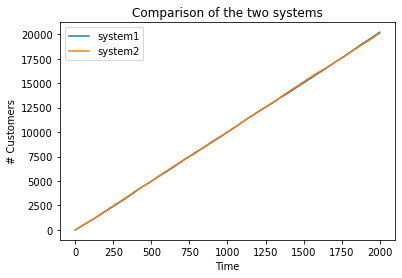

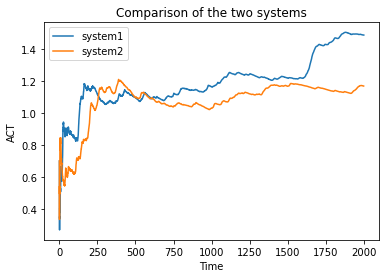

In [3]:
system_compare(aaa,bbb)

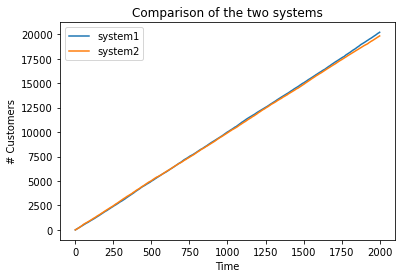

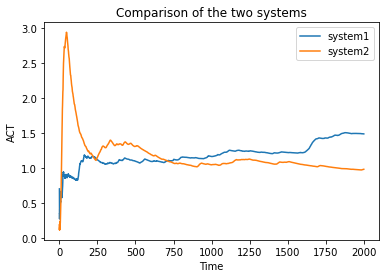

In [4]:
system_compare(aaa,ccc)

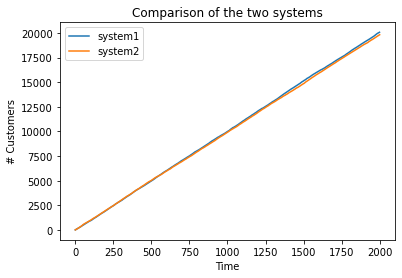

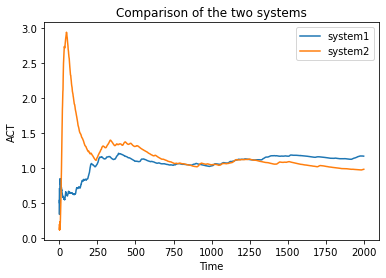

In [5]:
system_compare(bbb,ccc)

In [ ]:
stat.mean((aaa[8]['Finish'] - aaa[8]['Start']).to_numpy())

In [ ]:
stat.mean((bbb[8]['Finish'] - bbb[8]['Start']).to_numpy())

In [ ]:
stat.mean((ccc[8]['Finish'] - ccc[8]['Start']).to_numpy())